In [20]:
import warnings
warnings.filterwarnings('ignore')
# import geoplot as gplt

import geopandas as gpd
# import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import laspy
import rasterio
from rasterio import mask
import folium

In [32]:
import os 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et 


In [21]:
## Plot raster/tif image
# --------------------
def plot_raster(rast_data, title=''):
    """
    Plots raster tif image both in log scale(+1) and original verion
    """
    fig, (axlog, axorg) = plt.subplots(1, 2, figsize=(14,7))
    im1 = axlog.imshow(np.log1p(rast_data)) # vmin=0, vmax=2.1)
#     im2 = axorg.imshow(rast_data)

    plt.title("{}".format(title), fontdict = {'fontsize': 15})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

In [22]:
# Read raster/tif file
# --------------------
spr_tif = '../tif/IA_FullState.tif'
raster_spr = rasterio.open(spr_tif)
spr_data = raster_spr.read(1)

In [23]:
type(spr_data)

numpy.ndarray

In [24]:
count = spr_data[spr_data > 0].sum()
count

1116263271.308842

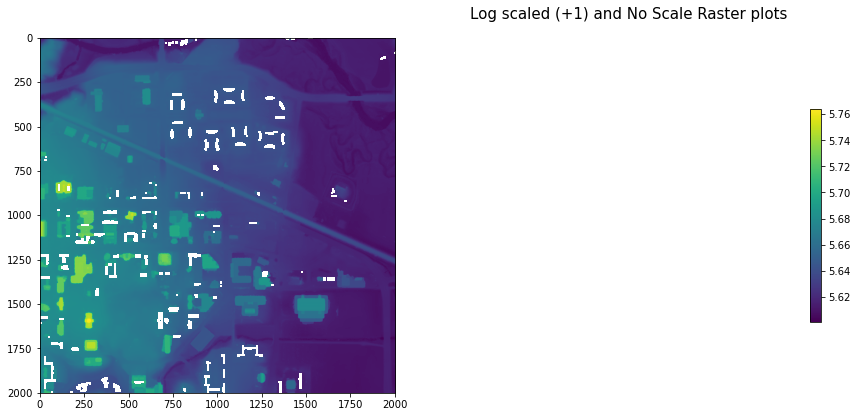

In [25]:
title = 'Log scaled (+1) and No Scale Raster plots'.format(count)
plot_raster(spr_data, title)

In [26]:
# get shp from tif
from glob import glob
def get_shp_from_tif(tif_path:str, shp_file_path:str) -> None:
    raster = rasterio.open(tif_path)
    bounds = raster.bounds

    df = gpd.GeoDataFrame({"id":1,"geometry":[box(*bounds)]})
   
    # save to file
    df.to_file(shp_file_path)
    print('Saved..')

In [27]:
tiffs = glob("../tif/*.tif")

tiffs.sort()

l = []

for i in tiffs:
    with rasterio.open(i, 'r', masked=True) as f:
        l.append(f.read(1))
    
arr_st = np.hstack(l[1:])

In [28]:
from shapely.geometry import box
get_shp_from_tif('../tif/IA_FullState.tif', shp_file_path='../shp/IA_FullState.shp')

Saved..


In [29]:
shps = glob('../shp/*.shp')
shps.sort()
shapefiles = []
for i in shps:
    usa_gdf = (gpd.GeoDataFrame.from_file(i))

In [30]:
usa_gdf.shape

(1, 2)

In [31]:
usa_gdf.head(4)

,id,geometry
0,1,"POLYGON ((-11666600.700 4776607.300, -11669524..."


In [14]:
usa_gdf.columns

Index(['id', 'geometry'], dtype='object')

Text(0.5, 1.0, 'USA: regions')

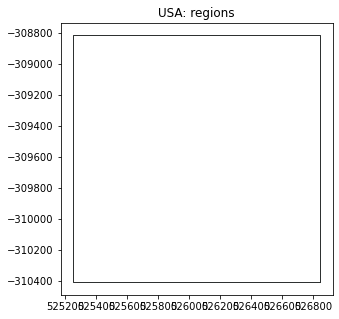

In [15]:
# plot the shapefile
plt.rcParams['figure.figsize'] = 10,5
usa_gdf.plot(color="white", edgecolor="#2e3131", figsize=(10, 5))
plt.title('USA: regions')

In [18]:
usa_gdf['area'] = usa_gdf.area
# Returns a GeoSeries of points for each geometric centroid.
usa_gdf['centroid'] = usa_gdf.centroid
# Returns a GeoSeries of geometries representing the point or smallest rectangular
# polygon (with sides parallel to the coordinate axes) that contains each object.
usa_gdf['envelope'] = usa_gdf.envelope

In [19]:
print(usa_gdf.crs)

None


In [37]:
def set_projection(shpfile):
    file = gpd.read_file(shpfile)
    file = file.set_crs('epsg:26915')
    #print(file.crs)
    
    return file

In [40]:
r=set_projection('../shp/IA_FullState.shp')
r

epsg:26915


,id,geometry
0,1,"POLYGON ((-10423170.940 5164494.710, -10425171..."


In [41]:
print(r.crs)

epsg:26915


In [ ]:
def elevation(shpfile,tiffile):
    station=gpd.read_file(shpfile)
    ##extracting longitude and laitude from the shapefile
    name=station.id
    geometry=station['geometry']
    long=station.iloc[0].geometry.centroid.x
    lat=station.iloc[0].geometry.centroid.y
    #opening tif file with rasterio
    dem=rasterio.open(tiffile)
    row,col=dem.index(long,lat)
    
    elevate=dem.read(1)
    elevation=elevate[row,col]
    
    df=pd.DataFrame([[name,long,lat,elevation,geometry]],columns=['Id','longititude','latitude','elevation(M)','geometry'])
    
    return elevation
